In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter('ignore')

In [3]:
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
url = 'https://raw.githubusercontent.com/boosuro/profit_estimation_of_companies/master/1000_Companies.csv'

In [4]:
df = pd.read_csv(url)
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.800,471784.1000,New York,192261.83000
1,162597.70,151377.590,443898.5300,California,191792.06000
2,153441.51,101145.550,407934.5400,Florida,191050.39000
3,144372.41,118671.850,383199.6200,New York,182901.99000
4,142107.34,91391.770,366168.4200,Florida,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [6]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
# df.corr() nu functioneaza pt ca State este de tip string

In [8]:
tabel_corelatie = df.drop(columns='State', inplace = False).corr()
tabel_corelatie

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.582434,0.978407,0.945245
Administration,0.582434,1.000000,0.520465,0.741560
Marketing Spend,0.978407,0.520465,1.000000,0.917270
Profit,0.945245,0.741560,0.917270,1.000000


<Axes: >

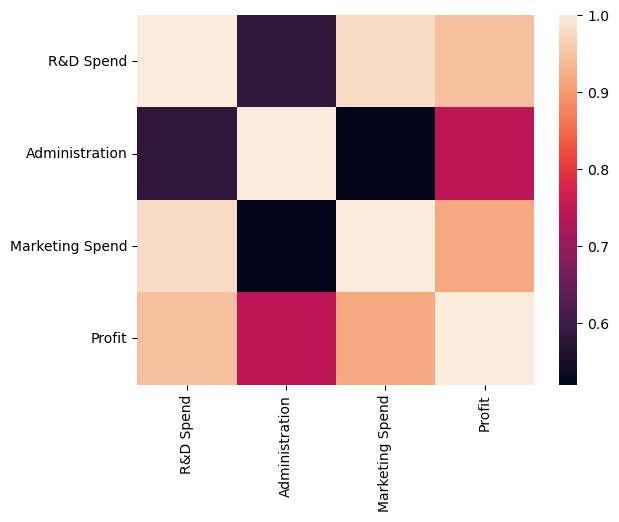

In [9]:
sns.heatmap(tabel_corelatie)

In [10]:
df.shape

(1000, 5)

In [11]:
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

<Axes: xlabel='State', ylabel='Profit'>

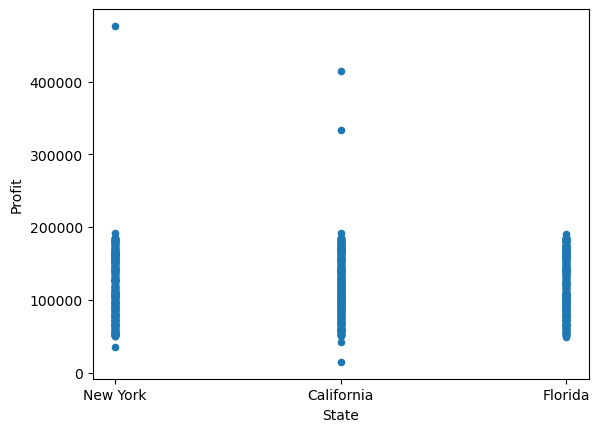

In [12]:
df.plot(kind = 'scatter', x ='State', y = 'Profit')



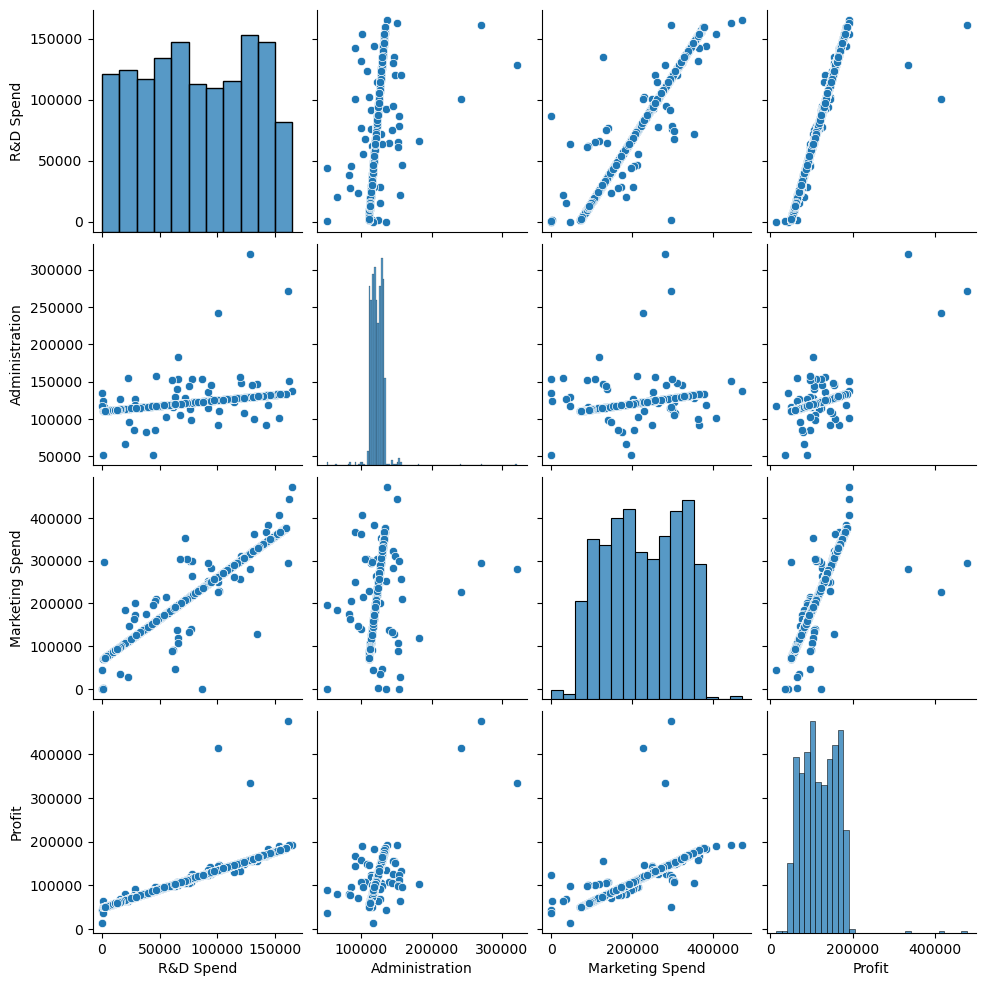

In [13]:
sns.pairplot(df)

In [14]:
df2 = df.copy()
y = df2['Profit']
df2 = df2.drop(columns = "Profit")

In [15]:
y
df2

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.800,471784.1000,New York
1,162597.70,151377.590,443898.5300,California
2,153441.51,101145.550,407934.5400,Florida
3,144372.41,118671.850,383199.6200,New York
4,142107.34,91391.770,366168.4200,Florida
...,...,...,...,...
995,54135.00,118451.999,173232.6695,California
996,134970.00,130390.080,329204.0228,California
997,100275.47,241926.310,227142.8200,California
998,128456.23,321652.140,281692.3200,California


In [16]:
df3 = pd.get_dummies(df2, columns=["State"])
df3

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,165349.20,136897.800,471784.1000,False,False,True
1,162597.70,151377.590,443898.5300,True,False,False
2,153441.51,101145.550,407934.5400,False,True,False
3,144372.41,118671.850,383199.6200,False,False,True
4,142107.34,91391.770,366168.4200,False,True,False
...,...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,True,False,False
996,134970.00,130390.080,329204.0228,True,False,False
997,100275.47,241926.310,227142.8200,True,False,False
998,128456.23,321652.140,281692.3200,True,False,False


In [17]:
# Transformarea atributului discret State in dummy variabile
df2 = pd.get_dummies(df2, columns=["State"], prefix=["State_is"] )
X = df2
X

,R&D Spend,Administration,Marketing Spend,State_is_California,State_is_Florida,State_is_New York
0,165349.20,136897.800,471784.1000,False,False,True
1,162597.70,151377.590,443898.5300,True,False,False
2,153441.51,101145.550,407934.5400,False,True,False
3,144372.41,118671.850,383199.6200,False,False,True
4,142107.34,91391.770,366168.4200,False,True,False
...,...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,True,False,False
996,134970.00,130390.080,329204.0228,True,False,False
997,100275.47,241926.310,227142.8200,True,False,False
998,128456.23,321652.140,281692.3200,True,False,False


# Exercitiu: 
Sa se aplice RandomForestRegressor pentru modelare.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeRegressor

import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics, linear_model

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


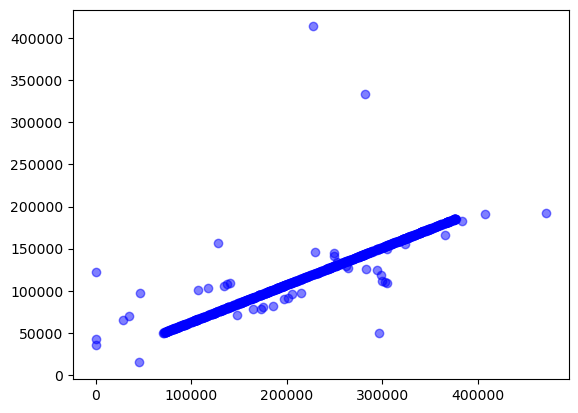

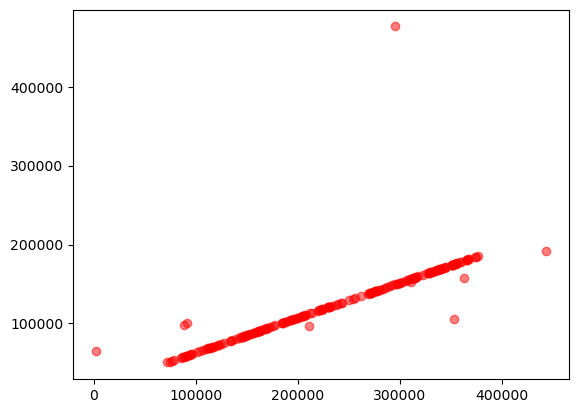

In [20]:
plt.scatter(X_train['Marketing Spend'], y_train, color ='b', alpha = 0.5)
plt.show()
plt.scatter(X_test['Marketing Spend'], y_test, color ='r', alpha = 0.5)
plt.show()

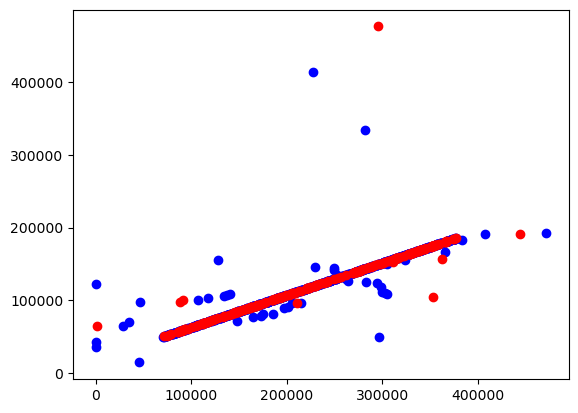

In [21]:
plt.scatter(X_train['Marketing Spend'], y_train, color ='b')
plt.scatter(X_test['Marketing Spend'], y_test, color ='r')


In [22]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=0)
#model =  linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)




In [23]:
# MSE= mean squared error
error = metrics.mean_squared_error(y_test, y_pred)
error


108712405.57887988

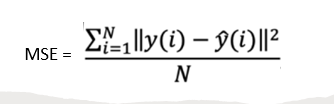


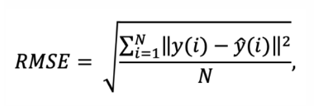

In [24]:
# RMSE root mean squared error

error = metrics.mean_squared_error(y_test, y_pred, squared=False)
error

10426.524136972967

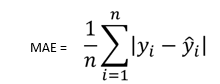

In [25]:
# MAE = mean absolute error
error = metrics.mean_absolute_error(y_test, y_pred)
error

1123.4816405130148

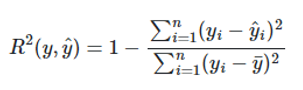 

In [26]:
error = metrics.r2_score(y_test,y_pred)
error

0.949798627620656

# Exercitiu: 
Sa se determine coeficientii si intercept pentru estimarea Profitului cu algoritmul LinearRegression.
Sa se scrie ecuatia dreptei corespunzatoare.


In [27]:
from sklearn import metrics, linear_model

model =  linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
 



In [28]:
print("R2 score", metrics.r2_score(y_test,y_pred))
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("RMSE", metrics.mean_squared_error(y_test, y_pred, squared =False))
print("MAE", metrics.mean_absolute_error(y_test, y_pred))



R2 score 0.9112695892268796
MSE 192148061.81508076
RMSE 13861.748151480779
MAE 2300.221750983353


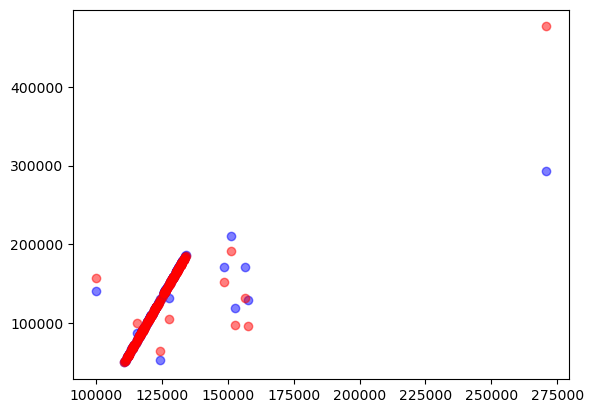

In [29]:
plt.scatter(X_test['Administration'], y_pred, color ='b', alpha=0.5)
plt.scatter(X_test['Administration'], y_test, color ='r', alpha=0.5)
plt.show()

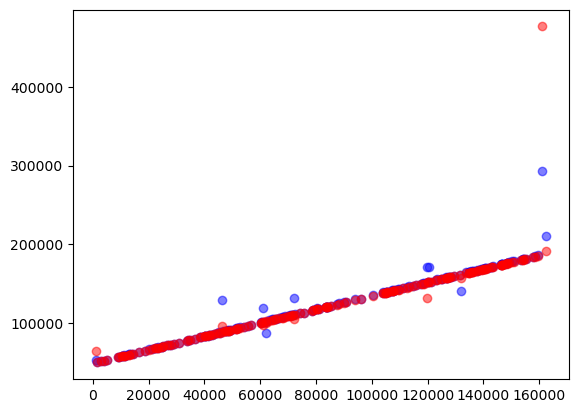

In [30]:
plt.scatter(X_test['R&D Spend'], y_pred, color ='b', alpha=0.5)

plt.scatter(X_test['R&D Spend'], y_test, color ='r', alpha=0.5)


# Implementarea: date noi


In [31]:
X_test

,R&D Spend,Administration,Marketing Spend,State_is_California,State_is_Florida,State_is_New York
993,46798.0,117368.4374,159075.9080,True,False,False
859,45209.0,117133.7666,156009.9281,True,False,False
298,52746.0,118246.8651,170552.5902,True,False,False
553,147916.0,132302.0043,354183.3651,False,True,False
672,40178.0,116390.7656,146302.5999,False,False,True
...,...,...,...,...,...,...
679,135489.0,130466.7283,330205.4347,True,False,False
722,139729.0,131092.9108,338386.5263,False,True,False
215,113478.0,127216.0435,287735.1501,True,False,False
653,107750.0,126370.1064,276682.9584,False,False,True


In [32]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


In [33]:
new = [[45600, 120000, 150000, 1, 0, 0], [80000, 130000, 200000,0, 0,1]]

In [34]:
model.predict(new)

array([ 90406.38540903, 121619.93540503])

**RandomForest Regressor**

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
model = RandomForestRegressor(random_state=0)
#model =  linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
error = metrics.mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print ("score:", score)
 

score: 0.949798627620656


**GradientBoostingRegressor**

In [36]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(metrics.r2_score(y_test, y_pred))


0.9537785613963607


**Linear Regression**

In [37]:
from sklearn.metrics import r2_score
model =  linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
error = metrics.mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print ("score:", score)
print("coeficientii:")
print(model.coef_)
print("intersectia cu Oy")
print(model.intercept_)


score: 0.9112695892268796
coeficientii:
[ 5.25845857e-01  8.44390881e-01  1.07574255e-01  5.26235224e+02
 -3.54301375e+02 -1.71933849e+02]
intersectia cu Oy
-51561.46494777134


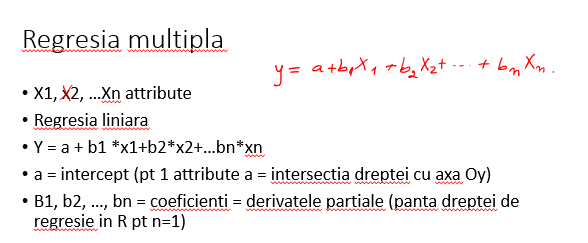
 

Profit = -51561.46494777105 +5.25845857e-01 * R&D spend + 8.44390881e-01 * Administration +1.07574255e-01 * Marketing Spend + 5.26235224e+02 * State_is_California + -3.54301375e+02 * State_is_Florida + -1.71933849e+02 * State_is_New York

In [38]:
new = [[45600, 120000, 150000, 1, 0, 0], [80000, 130000, 200000,0, 0,1]]

In [39]:
model.predict(new)

array([ 90406.38540903, 121619.93540503])

0.7362032133164418


[Text(0.5, 0.8333333333333334, 'x[0] <= 82618.0\nsquared_error = 1750673715.222\nsamples = 800\nvalue = 118552.284'),
 Text(0.25, 0.5, 'x[0] <= 40391.0\nsquared_error = 411291080.729\nsamples = 413\nvalue = 84489.659'),
 Text(0.125, 0.16666666666666666, 'squared_error = 118316409.735\nsamples = 195\nvalue = 66036.327'),
 Text(0.375, 0.16666666666666666, 'squared_error = 96295230.508\nsamples = 218\nvalue = 100996.079'),
 Text(0.75, 0.5, 'x[1] <= 128716.0\nsquared_error = 620427443.991\nsamples = 387\nvalue = 154903.355'),
 Text(0.625, 0.16666666666666666, 'squared_error = 129908689.272\nsamples = 191\nvalue = 137976.477'),
 Text(0.875, 0.16666666666666666, 'squared_error = 547135605.429\nsamples = 196\nvalue = 171398.425')]

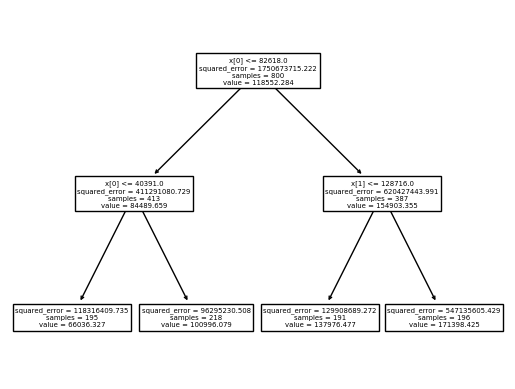

In [40]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
model =  DecisionTreeRegressor(max_depth=2, random_state = 0)
#model =  DecisionTreeRegressor( random_state = 0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
error = metrics.mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print(score)


tree.plot_tree(model)